In [1]:
import os, sys
import ase
import ase.calculators.vasp
import ase.io 
import ase.units
import ase.visualize
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import mywrapper

# In the following, lets try to identify if Cu is more stable in the bcc form or in the fcc form (based on the internal energies):

Text(0, 0.5, 'Energy/atom (eV)')

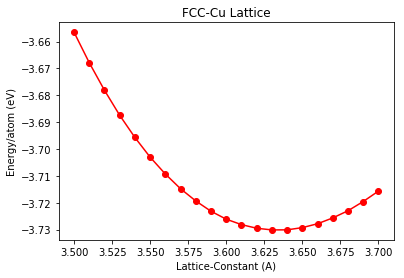

In [2]:
# lets calculate the fcc-phase first

alat = [3.6 + x/100.0 for x in range(-10,11)]
energies = []

pwd = os.getcwd()
for a in alat:
    path = "Cu/fcc/%d" % (int(100*a))
    
    cell = [[a,0,0], [0,a,0], [0,0,a]]
    atoms = ase.Atoms([ase.Atom('Cu', [0.0,0.0,0.0]), 
                       ase.Atom('Cu', [0.5*a, 0.5*a, 0.0*a]),
                       ase.Atom('Cu', [0.5*a, 0.0*a, 0.5*a]),
                       ase.Atom('Cu', [0.0*a, 0.5*a, 0.5*a]),])
    atoms.set_cell(cell)
    
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[8,8,8],
            encut=400,
            ediff=1e-5,
            algo='fast',
            prec='accurate',
            nelmin=4,
            nelm=100,
            ismear=0,
            sigma=0.05,
            lwave=False,   
            npar=2, 
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
volumes_fcc = (np.array(alat)**3)/4.0         # volume of FCC per atom
energies_fcc = np.array(energies)/4.0                   # FCC has 4 atoms unitcell

plt.figure(0)
plt.plot(alat, energies_fcc, 'ro-')
plt.title('FCC-Cu Lattice')
plt.xlabel('Lattice-Constant (A)')
plt.ylabel('Energy/atom (eV)')

# We could use ASE-inbuild interface for equation of state to find the equilibrium volume and the Bulk Modulus

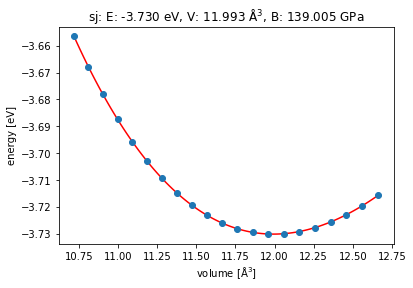

Relaxed Lattice Constant: 3.634


In [3]:
import ase.eos

eos = ase.eos.EquationOfState(volumes_fcc, energies_fcc)
v0_fcc, e0_fcc, B_fcc = eos.fit()
eos.plot()
print("Relaxed Lattice Constant: %5.3f" % (( (4.0*v0_fcc)**(1.0/3.0) )))

Now we will try to calculate the energies for the BCC phase. 
We can guess the initial lattice-constant by assuming that the `volume/atom` to be more-or-less same in the equilibrium phase.

In [6]:
# first get the lattice-constant if assuming volume/atom are same in fcc and bcc phases

v0_bcc = 2*v0_fcc       # bcc has two atoms in the unitcell
a0 = v0_bcc**(1.0/3.0)

In [8]:
# now get the energies

# lets calculate the bcc-phase now
alat_scale = [x/100 for x in range(90,110)]
energies = []

for scale in alat_scale:
    
    path = "Cu/bcc/%d" % (int(100*a))
    a = a0*scale
    cell = [[a,0,0], [0,a,0], [0,0,a]]
    atoms = ase.Atoms([ase.Atom('Cu', [0.0,0.0,0.0]), 
                       ase.Atom('Cu', [0.5*a, 0.5*a, 0.5*a])])
    atoms.set_cell(cell)
    
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[8,8,8],
            encut=400,
            ediff=1e-5,
            algo='fast',
            prec='accurate',
            nelmin=4,
            nelm=100,
            ismear=0,
            sigma=0.05,
            lwave=False,   
            npar=2, 
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
   
alat = a0 * np.array(alat_scale)
volumes_bcc = (np.array(alat)**3)/2.0 
energies_bcc = np.array(energies)/2.0

plt.figure(1)
plt.plot(alat, energies_bcc, 'ro-')
plt.title('BCC-Cu Lattice')
plt.xlabel('Lattice-Constant (A)')
plt.ylabel('Energy/atom (eV)')

NameError: name 'alat_scale' is not defined

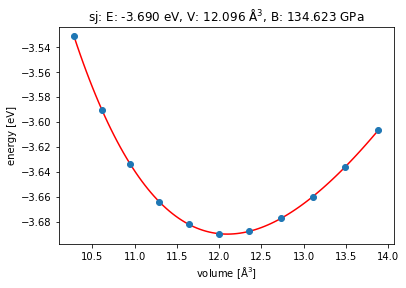

Relaxed Lattice Constant: 2.892


In [6]:
eos = ase.eos.EquationOfState(volumes_bcc, energies_bcc)
v0_bcc, e0_bcc, B_bcc = eos.fit()
eos.plot()
print("Relaxed Lattice Constant: %5.3f" % (( (2.0*v0_bcc)**(1.0/3.0) )))

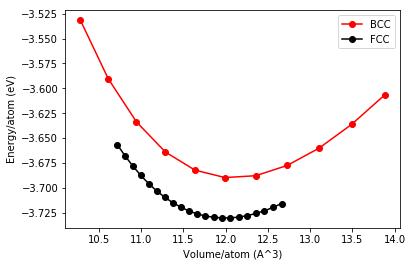

In [7]:
# plot bcc and fcc values together

plt.figure(2)
plt.plot(volumes_bcc, energies_bcc, 'ro-')
plt.plot(volumes_fcc, energies_fcc, 'ko-')
plt.xlabel('Volume/atom (A^3)')
plt.ylabel('Energy/atom (eV)')
plt.legend(['BCC', 'FCC'])

In [8]:
print('FCC relaxed volume/atom: %5.3f' % (v0_fcc))
print('BCC relaxed volume/atom: %5.3f' % (v0_bcc))

FCC relaxed volume/atom: 11.993
BCC relaxed volume/atom: 12.096
